In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()
import seaborn as sns

D:\programs\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data_full = pd.read_csv('data_train_full.csv')

In [4]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499991 entries, 0 to 499990
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                499991 non-null  int64  
 1   customer_id               499991 non-null  int64  
 2   total_revenue             499991 non-null  float64
 3   average_revenue           499991 non-null  float64
 4   count                     499991 non-null  int64  
 5   weekday                   499991 non-null  int64  
 6   time_of_day               499991 non-null  int64  
 7   sauces                    499991 non-null  float64
 8   main_food                 499991 non-null  float64
 9   snacks                    499991 non-null  float64
 10  cold_drinks               499991 non-null  float64
 11  hot_drinks                499991 non-null  float64
 12  alco                      499991 non-null  float64
 13  desert                    499991 non-null  f


0   Unnamed: 0                112334 non-null  int64    
 1   customer_id               112334 non-null  int64    ь  
 2   total_revenue             112334 non-null  float64   суммарный чек  
 3   average_revenue           112334 non-null  float64   средний чек  
 4   count                     112334 non-null  int64  среднее число покупок  
 5   weekday                   112334 non-null  int64  день недели  
 6   time_of_day               112334 non-null  int64  ночь утро день вечер  
 7   sauces                    112334 non-null  float64 среднее количество позиции в чеке
 8   main_food                 112334 non-null  float64    
 9   snacks                    112334 non-null  float64  
 10  cold_drinks               112334 non-null  float64  
 11  hot_drinks                112334 non-null  float64    
 12  alco                      112334 non-null  float64  
 13  desert                    112334 non-null  float64   
 14  favourite_ownareaall_cat  112334 non-null  int64  любимая категория площадь (мелкая средняя большая)  
 15  ownareaall_sqm_mean       112334 non-null  float64 средняя площадь посещаемых заведений  
 16  favourite_format_name     112334 non-null  object  любимый формат заведений  
 17  churn_rate_mean           112334 non-null  float64 средний рейтинг заведений (процент оттока заведения)  
 18  churn_rate_std            112334 non-null  float64 СКО от рейтинга  
 19  favourite_outlet_id       112334 non-null  int64  ID любимого заведения  
 20  favourite_churn_rate      112334 non-null  float64 рейтинг любимого заведения  
 21  day_diff_1                112334 non-null  float64 разница меж последним и 2 с конца чеком(в сек)   
 22  day_diff_2                112332 non-null  float64 между 2 и 3 с конца  
 23  day_diff_mean             112334 non-null  float64 средняя разница меж покупками в секундах  
 24  day_diff_std              112332 non-null  float64  
 25  buy_post                  499991 non-null  int64    
 26  date_diff_post            359090 non-null  float64  
    

In [16]:
#Найдем количество ушедших пользователей 
zero=data_full[data_full['buy_post']==0]['total_revenue'].count()
zero

140901

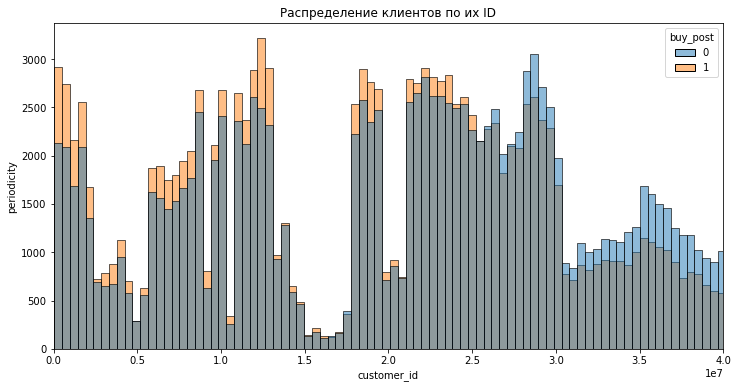

In [112]:
data1 = data_full[data_full['buy_post']==1].sample(zero)
data0 = data_full[data_full['buy_post']==0]
#display(data_full[data_full['buy_post']==1]['total_revenue'].describe())
#display(data_full[data_full['buy_post']==0]['total_revenue'].describe())


data_graf = pd.concat([data1, data0], ignore_index=True)
plt.figure(figsize=(12,6))
sns.histplot(data=data_graf, x="customer_id", hue="buy_post", bins=100)
plt.xlim(0, 40000000);
plt.ylabel("periodicity")

plt.title("Распределение клиентов по их ID");


Из двух равных образцов типов клиентов можно сделать важный вывод что новые клиенты остаются реже.  
Клиенты оформившие свой аккаунт в начале отслеживаемого отрезка чаще остаются постоянными

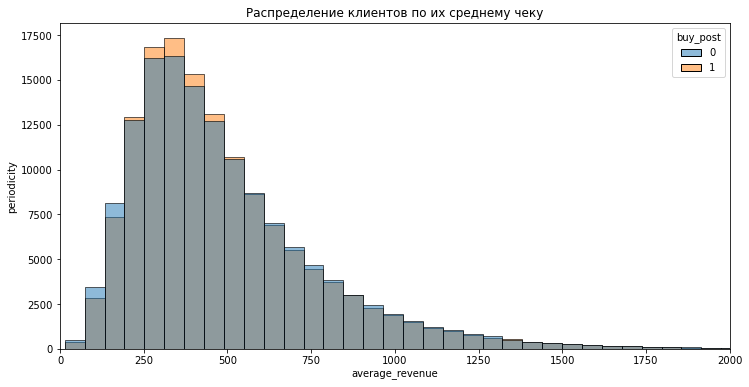

In [113]:
data1 = data_full[data_full['buy_post']==1].sample(zero)
data0 = data_full[data_full['buy_post']==0]
#display(data_full[data_full['buy_post']==1]['count'].describe())
#display(data_full[data_full['buy_post']==0]['count'].describe())


data_graf = pd.concat([data1, data0], ignore_index=True)
plt.figure(figsize=(12,6))
sns.histplot(data=data_graf, x="average_revenue", hue="buy_post", bins=100)
plt.xlim(0, 2000);
plt.ylabel("periodicity")

plt.title("Распределение клиентов по их среднему чеку");



Средний чек для разных типов клиентов почти не отличается

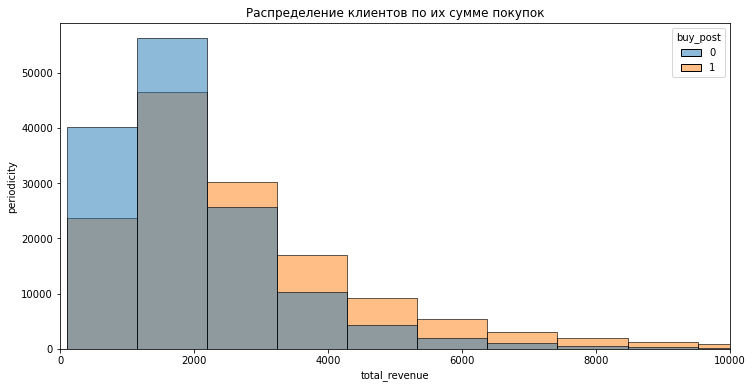

In [111]:
data1 = data_full[data_full['buy_post']==1].sample(zero)
data0 = data_full[data_full['buy_post']==0]
#display(data_full[data_full['buy_post']==1]['total_revenue'].describe())
#display(data_full[data_full['buy_post']==0]['total_revenue'].describe())


data_graf = pd.concat([data1, data0], ignore_index=True)
plt.figure(figsize=(12,6))
sns.histplot(data=data_graf, x="total_revenue", hue="buy_post", bins=100)
plt.xlim(0, 10000);

plt.ylabel("periodicity")

plt.title("Распределение клиентов по их сумме покупок");


Постоянные клиенты совершают больше покупок и суммарно тратят больше денег

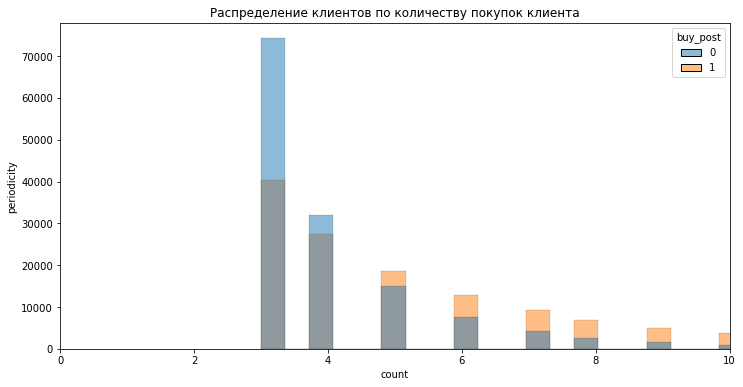

In [114]:
data1 = data_full[data_full['buy_post']==1].sample(zero)
data0 = data_full[data_full['buy_post']==0]
#display(data_full[data_full['buy_post']==1]['average_revenue'].describe())
#display(data_full[data_full['buy_post']==0]['average_revenue'].describe())


data_graf = pd.concat([data1, data0], ignore_index=True)
plt.figure(figsize=(12,6))
sns.histplot(data=data_graf, x="count", hue="buy_post", bins=500)
plt.xlim(0, 10);
plt.ylabel("periodicity")
plt.title("Распределение клиентов по количеству покупок клиента");



Постоянные клиенты покупают чаще больше позиций за один раз.
У ушедших клиентов наблюдается частый случай покупки только 3 позиций

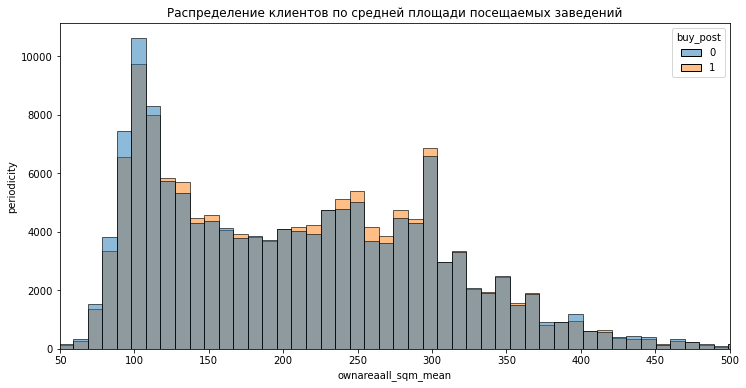

In [115]:
data1 = data_full[data_full['buy_post']==1].sample(zero)
data0 = data_full[data_full['buy_post']==0]
#display(data_full[data_full['buy_post']==1]['average_revenue'].describe())
#display(data_full[data_full['buy_post']==0]['average_revenue'].describe())

plt.figure(figsize=(12,6))
data_graf = pd.concat([data1, data0], ignore_index=True)
data_graf['day_diff_mean'] = data_graf['day_diff_mean']
sns.histplot(data=data_graf, x="ownareaall_sqm_mean", hue="buy_post", bins=100)
plt.xlim(50,500);
plt.ylabel("periodicity")

plt.title("Распределение клиентов по средней площади посещаемых заведений");



У клиентов в среднем наблюдаются одинаковые предпочтения по заведениям